## Install Spark

In [ ]:
import time
import findspark
import numpy as np
Start=time.time()
# Download and install tools 

# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and Install Spark
!wget  -q http://apache.osuosl.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

# Install findspark
!pip install -q findspark

print(f"\nIt took {(time.time()-Start)} seconds to install all dependencies for spark to run on Google Colab. \n")


# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

findspark.init()

In [ ]:
import numpy as np
from pyspark.sql import SparkSession
 
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark 
NameList = ['Ahmad', 'Salem', 'Noor', 'Heba']
 
NumberOfSamples=int(1000)
 
df = spark.createDataFrame([{"Column1": np.random.randint(1,100), 
                             "Column2":np.random.randint(24,35), 
                             "Column3":np.random.random(),
                             "Name":str(np.random.choice(NameList,p=[.5,.2,.1,.2])),
                             }
                              for i in range(NumberOfSamples)])

/content/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


## Write a snippet to get the average value for "Column1" for each unique "Name"  in this df. 

In [ ]:
df.select('Name', 'Column1').groupBy('Name').avg().show()

+-----+-----------------+
| Name|     avg(Column1)|
+-----+-----------------+
|Ahmad|50.59143968871595|
|Salem|47.74285714285714|
| Heba|49.44607843137255|
| Noor| 53.1588785046729|
+-----+-----------------+



In [ ]:
df.groupBy('Name').agg({'Column1': 'mean'}).toPandas()


,Name,avg(Column1)
0,Ahmad,50.591440
1,Salem,47.742857
2,Heba,49.446078
3,Noor,53.158879


In [ ]:
df.{"column1"}=={"column0"}



SyntaxError: ignored

In [ ]:
df.drop_duplicates().show()

+-------+-------+--------------------+-----+
|Column1|Column2|             Column3| Name|
+-------+-------+--------------------+-----+
|     80|     25|   0.184020401790021|Ahmad|
|     96|     28|  0.7438315301983884|Ahmad|
|     15|     34|  0.9508664404845044| Noor|
|     32|     26|  0.1949985009773184|Ahmad|
|     81|     32| 0.13947073636116314| Noor|
|     12|     32|  0.8675762993082194|Ahmad|
|     70|     33|  0.6653738143997677| Heba|
|     53|     26|  0.7335305044677866|Ahmad|
|     81|     25| 0.04511861716959953| Heba|
|     92|     26| 0.44558102392836496|Ahmad|
|     94|     27|  0.9795578382709663| Heba|
|     19|     25|  0.5256790189480445|Ahmad|
|     62|     29| 0.16944686694512268|Ahmad|
|     71|     30|  0.9531283709369495|Salem|
|      2|     30|  0.5482608672376587|Ahmad|
|     41|     27|0.052091518041601614|Ahmad|
|     16|     26|  0.8979217152440176|Ahmad|
|     45|     24| 0.10283652402788279|Salem|
|     71|     27|   0.706632161360296|Ahmad|
|     12| 

Import the following libraries by adding the following command in your Jupyter Notebook and run the cell. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we create a new DataFrame by importing the CSV file:

In [ ]:
URL='https://drive.google.com/uc?export=download&id=1DrRXkq78vRzJdlfsYJnQTN2-i1q-BC7D'
covid_df = pd.read_csv(URL, header=0)

To verify the DataFrame has loaded correctly, we can run a head() command to display the first few records:

In [ ]:
covid_df.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
0,3/9/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
1,3/8/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
2,3/7/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
3,3/6/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
4,3/5/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0


In [ ]:
covid_df_new=covid_df.dropna().sample(500).reset_index()

locations = covid_df_new[['Lat', 'Long']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]
['38.943070', '-77.115660']

['38.943070', '-77.115660']

In [ ]:
import folium
map = folium.Map(location=[38.9, -77.05], zoom_start=2)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=covid_df_new['Case_Type'][point]).add_to(map)
map

In [ ]:
import folium
map = folium.Map(location=[38.9, -77.05], tiles='CartoDB dark_matter',zoom_start=2)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=covid_df_new['Date'][point]).add_to(map)
map


Next we will isolate the data we want to focus our attention on by creating a new DataFrame from the source, and by applying a few filters against it. We want to isolate the records where all the following conditions are true. First the Daily Difference count is greater than zero. Next the Case Type should be Confirmed. Finally, the Country_Region should be only Italy:

In [ ]:
len(covid_df)

35502

In [ ]:
df_results = covid_df[(covid_df.Difference >0) & (covid_df.Case_Type == 'Confirmed') & (covid_df.Country_Region == 'Italy')]

To see the results sorted, we run the following command:

In [ ]:
df_results.sort_values(by='Cases', ascending=False)

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
28982,3/23/2020,Italy,NaN,4789,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,63927,43.0,12.0
28983,3/22/2020,Italy,NaN,5560,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,59138,43.0,12.0
28984,3/21/2020,Italy,NaN,6557,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,53578,43.0,12.0
28985,3/20/2020,Italy,NaN,5986,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,47021,43.0,12.0
28987,3/19/2020,Italy,NaN,5322,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,41035,43.0,12.0
28988,3/18/2020,Italy,NaN,4207,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,35713,43.0,12.0
28989,3/17/2020,Italy,NaN,3526,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,31506,43.0,12.0
28990,3/16/2020,Italy,NaN,3233,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,27980,43.0,12.0
28991,3/15/2020,Italy,NaN,3590,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,24747,43.0,12.0
28992,3/14/2020,Italy,NaN,3497,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,21157,43.0,12.0


Now we want to visually display the distribution of the values in the Difference column. We can pass an array of values into the default hist() plot using the following command:

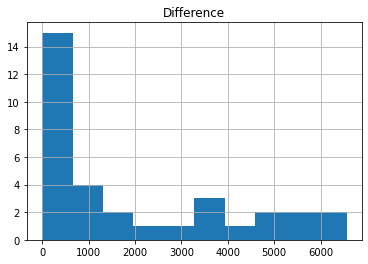

In [ ]:
df_results.hist(column='Difference');

Use the describe() function against this DataFrame to see summary statistics. We can look at one column by explicitly passing it in the square brackets along with the column /field name in double quotes:

In [ ]:
df_results["Difference"].describe()

count      33.000000
mean     1937.181818
std      2132.965299
min         1.000000
25%       202.000000
50%       778.000000
75%      3526.000000
max      6557.000000
Name: Difference, dtype: float64

## Understanding outliers and trends

Import the following libraries by adding the following command in your Jupyter Notebook and run the cell. Feel free to follow along by creating your own Notebook and I have placed a copy in GitHub for reference:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create a new DataFrame by importing the CSV file:

In [ ]:
covid_df = pd.read_csv(URL, header=0)

To verify the DataFrame has loaded correctly, we can run a head() command to display the first few records:

In [ ]:
covid_df.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
0,3/9/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
1,3/8/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
2,3/7/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
3,3/6/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
4,3/5/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0


Similar to the prior exercise, we will isolate the data we want to focus on attention on by creating a new DataFrame from the source and applying a few filters against it. We want to isolate the records where all the following conditions are true. First the Daily Difference count is greater than zero. Next the Case Type should be Confirmed. Finally, we use the pipe symbol | to create an “or” condition to allow for multiple Country_Regions:

In [ ]:
df_results = covid_df[(covid_df.Difference >0) & (covid_df.Case_Type == 'Confirmed') & ((covid_df.Country_Region == 'Italy') | (covid_df.Country_Region == 'Spain') | (covid_df.Country_Region == 'Germany'))]

To see the results, we run the following command:

In [ ]:
df_results.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
20191,3/9/2020,Germany,NaN,136,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1176,51.0,9.0
20192,3/8/2020,Germany,NaN,241,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1040,51.0,9.0
20193,3/7/2020,Germany,NaN,129,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,799,51.0,9.0
20194,3/6/2020,Germany,NaN,188,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,670,51.0,9.0
20195,3/5/2020,Germany,NaN,220,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,482,51.0,9.0


To display a box plot by Country, we use the following command. The boxplot() has a few parameters like the by= which allows us to group the data by the Country_Region. We also include the column= to isolate the values in the Difference field. Finally, we pass in the grid=False to turn off the grid lines in the chart:

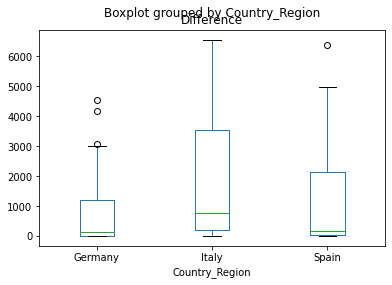

In [ ]:
df_results.boxplot(by='Country_Region', column=['Difference'], grid=False);

## Finding patterns in data

Import the following libraries by adding the following command in your Jupyter Notebook and run the cell. Feel free to follow along by creating your own Notebook and I have placed a copy in GitHub for reference:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create a new DataFrame by importing the CSV file:

In [2]:
covid_df = pd.read_csv(URL, header=0)

NameError: ignored

We will now create two new DataFrames which will be subsets from the original source. The advantage of naming them generically as df_results_1 and df_results_2 allows you to adjust the filters like Country_Region used in this one line without changing any other code in the additional steps:

In [ ]:
df_results_1 = covid_df[(covid_df.Case_Type == 'Confirmed') & (covid_df.Country_Region == 'Germany')]

Run a head() command to validate the results:

In [ ]:
df_results_1.head()

We will load the second DataFrame that we will use to compare with the first using the following commands:

In [ ]:
df_results_2 = covid_df[(covid_df.Case_Type == 'Confirmed') & (covid_df.Country_Region == 'Italy')]

Run a head() command to validate the results:

In [ ]:
df_results_2.head()

Lets profile the data in each DataFrame to better understand it. We use the describe() function to better identify key statistics and how the data is distributed:

In [ ]:
df_results_1["Cases"].describe()

In [ ]:
df_results_2["Cases"].describe()

We use the plt.scatter() function to create the visualization. It requires two parameters which are the x and y axis values separated by a comma. We are passing the common series of values found in the Cases column from each DataFrame. We also include labels and a title to help the audience understand the chart:

In [ ]:
plt.scatter(df_results_1["Cases"], df_results_2["Cases"]);
plt.title("# of Cases")
plt.xlabel("Germany Cases")
plt.ylabel("Italy Cases");